<a href="https://colab.research.google.com/github/snehanshastri/BIS/blob/main/AntColonyOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1/100: Best Distance = 22.557900792370614
Iteration 2/100: Best Distance = 22.557900792370614
Iteration 3/100: Best Distance = 22.557900792370614
Iteration 4/100: Best Distance = 22.557900792370614
Iteration 5/100: Best Distance = 22.557900792370614
Iteration 6/100: Best Distance = 22.557900792370614
Iteration 7/100: Best Distance = 22.557900792370614
Iteration 8/100: Best Distance = 22.557900792370614
Iteration 9/100: Best Distance = 22.557900792370614
Iteration 10/100: Best Distance = 22.557900792370614
Iteration 11/100: Best Distance = 22.557900792370614
Iteration 12/100: Best Distance = 22.557900792370614
Iteration 13/100: Best Distance = 22.557900792370614
Iteration 14/100: Best Distance = 22.557900792370614
Iteration 15/100: Best Distance = 22.557900792370614
Iteration 16/100: Best Distance = 22.557900792370614
Iteration 17/100: Best Distance = 22.557900792370614
Iteration 18/100: Best Distance = 22.557900792370614
Iteration 19/100: Best Distance = 22.557900792370614
It

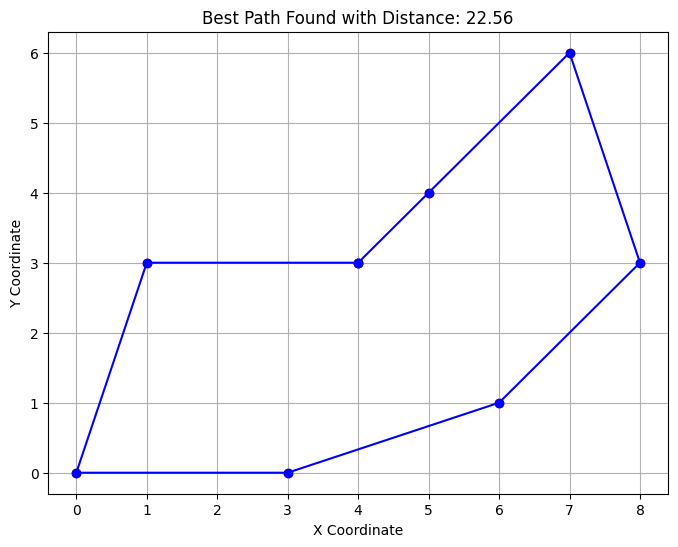

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

class AntColony:
    def __init__(self, cities, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
        """
        Initialize the Ant Colony Optimization parameters.
        cities: List of coordinates for the cities.
        n_ants: Number of ants in each iteration.
        n_iterations: Number of iterations.
        alpha: Influence of pheromone on path selection.
        beta: Influence of distance on path selection.
        evaporation_rate: Rate at which pheromone evaporates.
        Q: Constant used to calculate pheromone updates.
        """
        self.cities = cities
        self.n_cities = len(cities)
        self.distances = self.calculate_distances()
        self.pheromones = np.ones((self.n_cities, self.n_cities))  # Initial pheromone levels
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.Q = Q
        self.best_path = None
        self.best_distance = float('inf')

    def calculate_distances(self):
        """Calculate the distance matrix between all cities."""
        dist_matrix = np.zeros((self.n_cities, self.n_cities))
        for i in range(self.n_cities):
            for j in range(self.n_cities):
                if i != j:
                    dist_matrix[i][j] = np.linalg.norm(np.array(self.cities[i]) - np.array(self.cities[j]))
        return dist_matrix

    def update_pheromones(self, all_paths):
        """Update the pheromones based on the paths found by the ants."""
        # Evaporate pheromones
        self.pheromones *= (1 - self.evaporation_rate)

        # Add new pheromones based on the paths found by the ants
        for path, distance in all_paths:
            pheromone_deposit = self.Q / distance
            for i in range(len(path) - 1):
                self.pheromones[path[i]][path[i+1]] += pheromone_deposit
            self.pheromones[path[-1]][path[0]] += pheromone_deposit  # Return to start

    def select_next_city(self, current_city, visited):
        """Select the next city based on pheromone levels and distance."""
        probabilities = []
        total = 0
        for i in range(self.n_cities):
            if i not in visited:
                pheromone = self.pheromones[current_city][i] ** self.alpha
                distance = self.distances[current_city][i] ** self.beta
                probability = pheromone / distance
                probabilities.append(probability)
                total += probability
            else:
                probabilities.append(0)

        # Normalize probabilities
        probabilities = [p / total for p in probabilities]
        return random.choices(range(self.n_cities), probabilities)[0]

    def run(self):
        """Run the ACO algorithm."""
        for iteration in range(self.n_iterations):
            all_paths = []
            for _ in range(self.n_ants):
                path = self.construct_solution()
                distance = self.calculate_path_distance(path)
                all_paths.append((path, distance))

                # Update the best path found
                if distance < self.best_distance:
                    self.best_distance = distance
                    self.best_path = path

            # Update pheromones after all ants have completed their tour
            self.update_pheromones(all_paths)

            print(f"Iteration {iteration+1}/{self.n_iterations}: Best Distance = {self.best_distance}")

        return self.best_path, self.best_distance

    def construct_solution(self):
        """Construct a solution by letting an ant move from city to city."""
        path = []
        visited = set()
        current_city = random.randint(0, self.n_cities - 1)
        path.append(current_city)
        visited.add(current_city)

        for _ in range(self.n_cities - 1):
            next_city = self.select_next_city(current_city, visited)
            path.append(next_city)
            visited.add(next_city)
            current_city = next_city

        return path

    def calculate_path_distance(self, path):
        """Calculate the total distance of the path."""
        distance = 0
        for i in range(len(path) - 1):
            distance += self.distances[path[i]][path[i+1]]
        distance += self.distances[path[-1]][path[0]]  # Return to start
        return distance

    def plot_best_path(self):
        """Visualize the best path found."""
        if self.best_path is None:
            print("No path found yet.")
            return

        best_path_coords = [self.cities[i] for i in self.best_path] + [self.cities[self.best_path[0]]]
        x, y = zip(*best_path_coords)

        plt.figure(figsize=(8, 6))
        plt.plot(x, y, marker='o', color='b')
        plt.scatter(x, y, color='r')
        plt.title(f"Best Path Found with Distance: {self.best_distance:.2f}")
        plt.xlabel("X Coordinate")
        plt.ylabel("Y Coordinate")
        plt.grid(True)
        plt.show()

# Example usage
if __name__ == "__main__":
    # Example list of cities (coordinates)
    cities = [
        (0, 0), (1, 3), (4, 3), (6, 1), (3, 0), (5, 4), (7, 6), (8, 3)
    ]

    # Initialize the ACO
    aco = AntColony(
        cities=cities,
        n_ants=20,
        n_iterations=100,
        alpha=1,       # Pheromone influence
        beta=2,        # Distance influence
        evaporation_rate=0.5,
        Q=100
    )

    # Run ACO
    best_path, best_distance = aco.run()

    # Print the result
    print("Best Path:", best_path)
    print("Best Distance:", best_distance)

    # Plot the best path
    aco.plot_best_path()
